In [1]:
# import superblockify as sb
# import networkx as nx
import pandas as pd
import seaborn as sns
import scipy
import geopandas as gpd

In [3]:
df = pd.read_json("../data/processed/city_partners_public/metadata_cities.json")
df

,Cities,Area,Number of edges,Total road length,Road density,Total estimated population,Population density
0,Amsterdam,197.310440,29363,2773.695725,14.057521,1.116148e+06,5656.812950
1,Southwark,29.935407,9642,754.803041,25.214391,6.546476e+05,21868.672965
2,Vilnius,393.538646,18395,3474.021407,8.827650,9.697433e+05,2464.162799
3,Milan_Municipality,181.755362,25361,2525.412978,13.894572,1.717573e+06,9449.916510
4,Vratsa,15.643470,2619,268.839684,17.185426,4.688643e+04,2997.188369
5,Braga,55.123125,9834,967.107288,17.544493,2.009707e+05,3645.851553
6,Westminster,22.048690,7452,570.219287,25.861821,4.653211e+05,21104.249344
7,Riga,304.120728,23467,2962.878031,9.742440,9.981629e+05,3282.127131
8,Kozani,4.664904,3785,200.506345,42.981881,4.303159e+04,9224.538858
9,Zaragoza,46.546535,9008,783.128039,16.824626,6.429889e+05,13813.894527


In [4]:
# for city in df["Cities"].values:
#     G = sb.utils.load_graphml_dtypes(
#         f"../data/processed/city_partners_public/graphs_SB/{city}/{city}.graphml"
#     )
#     print(city, len(list(nx.weakly_connected_components(G))))

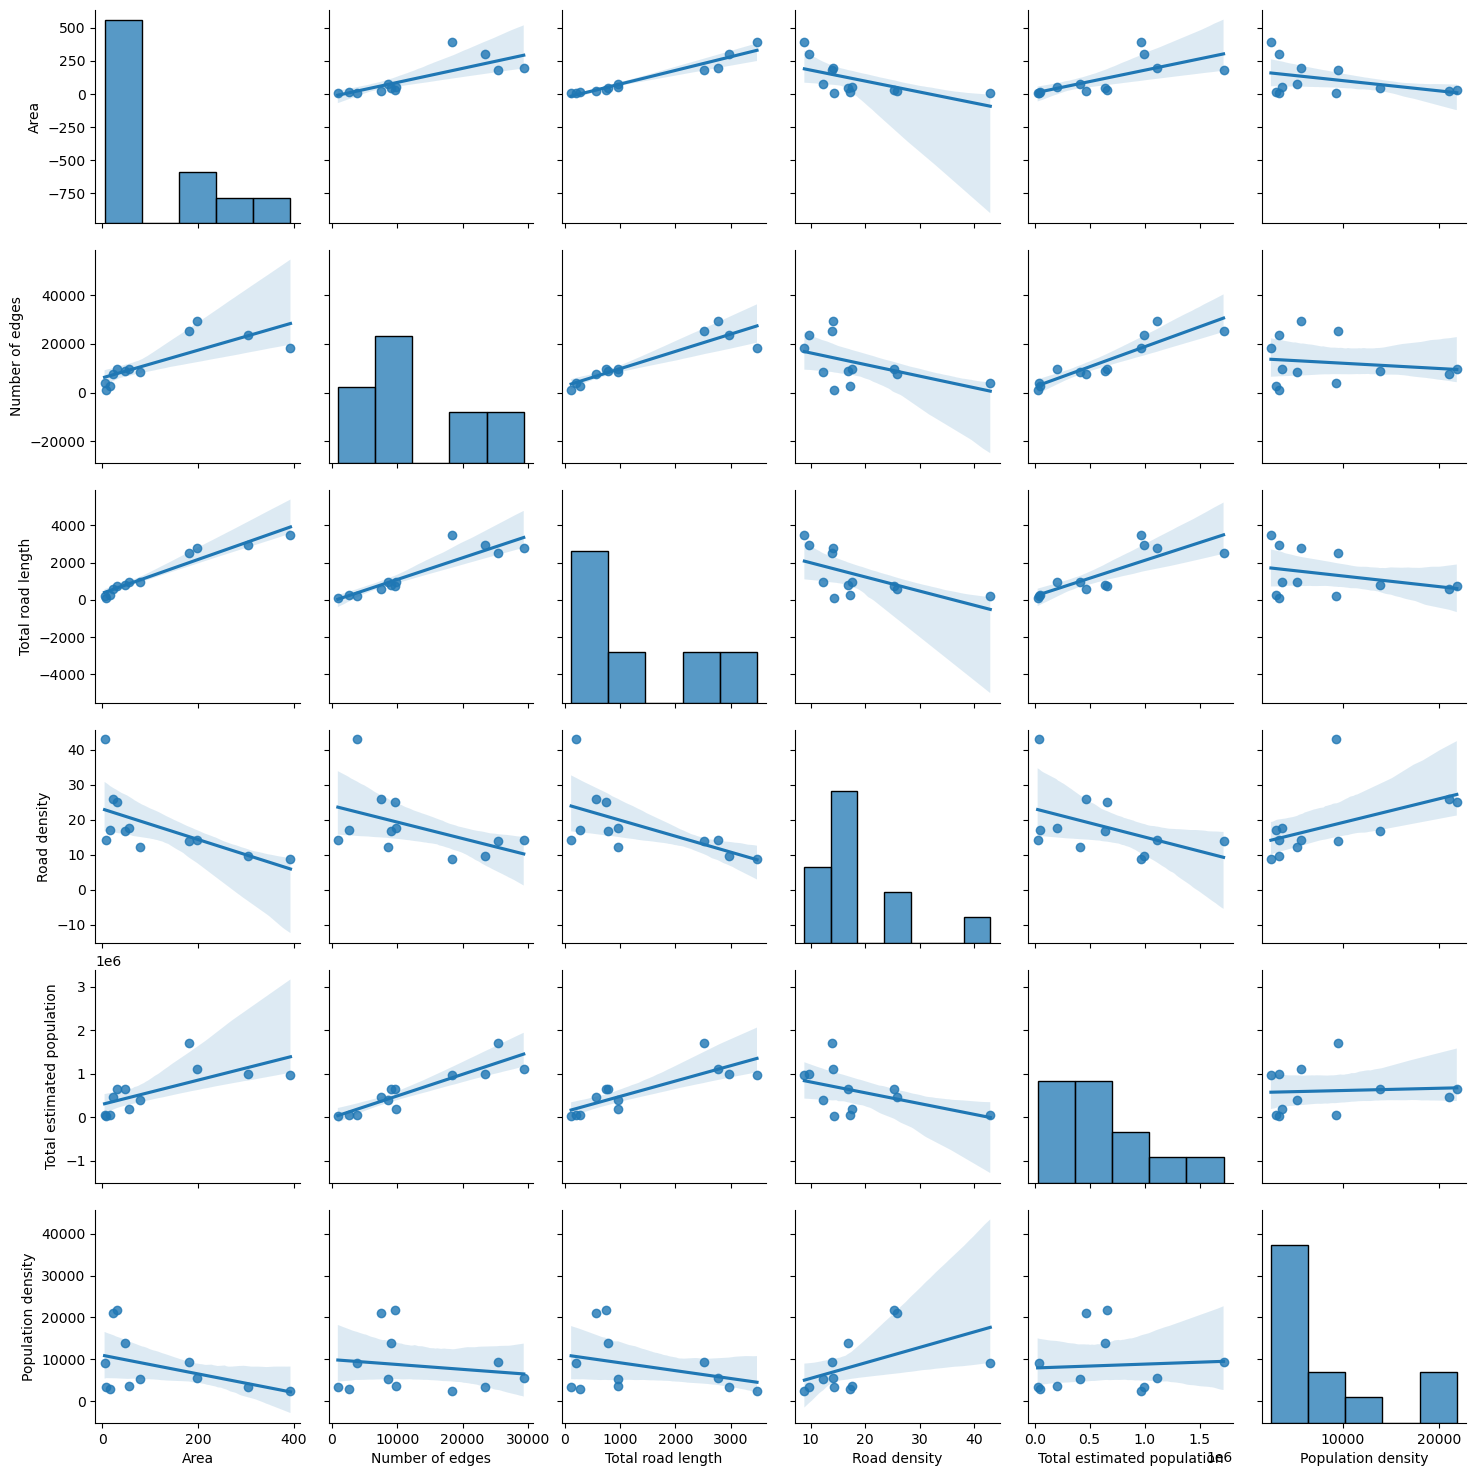

In [5]:
sns.pairplot(df, kind="reg", diag_kind="hist");

In [6]:
df_filt = df[df["Road density"] < 40]

In [7]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(
    df_filt["Road density"], df_filt["Population density"]
)
print(r_value)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(
    df_filt["Area"], df_filt["Road density"]
)
print(r_value)

0.8456822102993697
-0.7119070329732073


In [8]:
df = gpd.read_file(
    "../data/processed/city_partners_public/graphs_SB/Amsterdam/Amsterdam_betweenness.gpkg",
    layer="ltns",
)
len(df)

546

In [9]:
df_filt = df[
    (df["geometry"].area < 921600) & (df["geometry"].area > 25600) & (df["n"] > 5)
]
len(df_filt)

179

In [29]:
df = pd.read_json(
    "../data/processed/city_partners_public/results_cities_residential_filt.json"
)
df

,Cities,Amount of superblocks,Share of streets within superblocks,Share of the population within superblocks,Area of pacified streets
0,Amsterdam,305,39.6,50.5,31.1
1,Braga,87,40.0,49.3,38.3
2,Cugir,5,34.2,36.2,31.1
3,Haifa,92,36.5,50.5,39.1
4,Kozani,25,45.5,47.7,43.4
5,Milan_Municipality,253,28.4,41.1,27.6
6,Riga,234,38.0,43.8,26.3
7,Southwark,102,48.0,51.5,43.4
8,Vilnius,149,21.4,26.9,16.4
9,Vratsa,10,42.7,36.0,32.1


In [11]:
# TODO understand how to get the average travel distance increase on the entire graph

In [12]:
df = pd.read_json(
    "../data/processed/city_partners_public/graphs_SB/Amsterdam/sb_results/Amsterdam_residential/filt_partitions.json"
)

In [13]:
df

,name,value,m,n,length_total,ignore,representative_node_id,mean_edge_betweenness_normal,mean_edge_betweenness_length,mean_edge_betweenness_linear,...,street_length_total,street_segment_count,street_length_avg,circuity_avg,self_loop_proportion,node_density_km,intersection_density_km,edge_density_km,street_density_km,street_orientation_order
0,residential_1,1,18,10,2869.392188,False,46357461,0.001412,0.001382,0.418182,...,1434.696094,9,159.410677,1.011813,0.00,117.157243,93.725795,33617.007820,16808.503910,0.943615
1,residential_3,3,31,19,2606.874719,False,46346468,0.000342,0.000306,0.065154,...,1749.043620,19,92.054927,1.031411,0.00,189.218906,149.383347,25961.578023,17418.532655,0.887505
2,residential_4,4,67,38,6403.609668,False,46339795,0.000179,0.000149,0.030973,...,5183.893619,50,103.677872,1.041892,0.02,165.768898,165.768898,27934.718830,22613.903437,0.838390
3,residential_7,7,56,31,3491.000250,False,46385452,0.000497,0.000457,0.122830,...,2400.504226,36,66.680673,1.046537,0.00,157.803588,106.899205,17770.721432,12219.618688,0.828706
4,residential_8,8,38,24,3470.138596,False,46309787,0.001200,0.001158,0.258536,...,2958.261349,31,95.427785,1.033964,0.00,92.356324,84.659963,13353.718456,11383.922595,0.552302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,residential_585,585,10,6,904.370004,False,6920511303,0.000124,0.000093,0.021138,...,452.185002,5,90.437000,1.163618,0.00,158.476435,105.650956,23886.888955,11943.444478,0.972890
301,residential_594,594,22,12,959.643180,False,8837163758,0.000194,0.000159,0.038072,...,479.821590,11,43.620145,1.047697,0.00,374.154278,218.256662,29921.216718,14960.608359,0.813617
302,residential_605,605,38,15,2092.742325,False,6864387098,0.000272,0.000245,0.067462,...,1046.371162,19,55.072166,1.053684,0.00,472.518842,409.516330,65924.011995,32962.005997,0.599809
303,residential_608,608,81,37,6445.662595,False,6476636048,0.000279,0.000247,0.089388,...,4093.143855,51,80.257723,1.073322,0.00,181.567999,171.753513,31630.434043,20086.052414,0.902077


In [14]:
sum(df["area"])

41096360.7028219

In [2]:
import superblockify as sb

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


2025-04-28 13:27:08,465 |     INFO | __init__.py:11 | superblockify version 1.0.1


In [3]:
G = sb.utils.load_graphml_dtypes(
    "../data/processed/city_partners_public/graphs_SB/Amsterdam/Amsterdam.graphml"
)

In [12]:
G.edges[(6316199, 46379627, 0)]["geometry"].coords[0]

(628561.4884115539, 5803889.298643059)

In [9]:
G.nodes[6316199]

{'y': 5803889.298643059, 'x': 628561.4884115539, 'street_count': 3}

In [17]:
type(G.graph["boundary"])

shapely.geometry.polygon.Polygon

In [18]:
G.graph["crs"]

'EPSG:32631'

In [23]:
import geopandas as gpd
import shapely

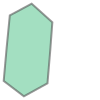

In [25]:
shapely.from_wkt(G.edges[(6316199, 46379627, 0)]["cell"])